In [43]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib as path
import requests as req
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress
# Import the OpenWeatherMap API key
from api_key import weather_api_key
# Import geoapify API key
from api_key import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ImportError: cannot import name 'path' from 'pathlib' (C:\Users\Owner\.conda\envs\dev\lib\pathlib.py)

In [2]:
#Calling openbrewerydb website to obtain all breweries worlwide.
beer_info_df = pd.DataFrame({'id':[],'name':[],'brewery_type':[],'address_1':[],'address_2':[],'address_3':[],
                             'city':[],'state_province':[],'postal_code':[],'country':[],'longitude':[],'latitude':[],
                             'phone':[],'website_url':[],'state':[],'street':[]})
try:
    page_count = int(8000 / 200)
    #page_count = 5 #testing
    for i in range(page_count):
        path = f"https://api.openbrewerydb.org/v1/breweries?per_page=200&page={str(i)}"
        print(path)
        beer_info = req.get(path).json()
        beer_info = pd.DataFrame(beer_info)
        beer_info_df = pd.concat([beer_info_df, beer_info], ignore_index=True)
except:
    
    print(f'Stopped at {i} pages')
beer_info_df

https://api.openbrewerydb.org/v1/breweries?per_page=200&page=0
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=1
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=2
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=3
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=4
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=5
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=6
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=7
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=8
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=9
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=10
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=11
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=12
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=13
https://api.openbrewerydb.org/v1/breweries?per_page=200&page=14
https://api.openbrewerydb.org/v1/breweries?per_pag

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,caa654e3-bfa9-4019-8e83-2aca7a423720,Victory Brewing Co,brewpub,650 W Cypress St Ste 1,None,None,Kennett Square,Pennsylvania,19348-3059,United States,None,None,4847301870,http://www.victorybeer.com,Pennsylvania,650 W Cypress St Ste 1
7996,392b4940-7333-4a2e-9e64-3b12e0290354,Victory Brewing Co,regional,3127 Lower Valley Rd,None,None,Parkesburg,Pennsylvania,19365-9617,United States,None,None,6108730881,http://www.victorybeer.com,Pennsylvania,3127 Lower Valley Rd
7997,60fad081-4a4e-4415-95d8-b478cb0ce9c1,Vierling Restaurant & Marquette Harbor Brewery,brewpub,119 S Front St,None,None,Marquette,Michigan,49855-4642,United States,-87.3928955,46.5425586,9062283533,http://www.thevierling.com,Michigan,119 S Front St
7998,b3be1ab8-d34b-465c-9704-b50364cfd061,Viewpoint Brewing Co,brewpub,2201 San Dieguito Dr Ste F,None,None,del Mar,California,92014-2257,United States,-117.2618232,32.970049,8583569346,http://www.viewpointbrewing.com,California,2201 San Dieguito Dr Ste F


In [3]:
#copying DF to new DF
Brewery_df = beer_info_df.copy()

In [4]:
#Dropped any rows that had none in the longitude field.
Brewery_df.dropna(subset=['longitude'], inplace=True)


In [5]:
Brewery_df

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
5,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,4c321585-4c57-400b-9a56-fb95767b8cee,Vicious Fishes Brewery,micro,219 Fish Dr,None,None,Angier,North Carolina,27501-6077,United States,-78.749408,35.507541,9196393369,http://www.viciousfishes.com,North Carolina,219 Fish Dr
7993,ccae7ca3-7457-44cf-8138-f6f5d8959b8c,Victor 23 Craft Brewery,brewpub,2905 St Johns Blvd,None,None,Vancouver,Washington,98661-3718,United States,-122.6464236,45.6426306,3609845413,http://www.Victor23.com,Washington,2905 St Johns Blvd
7997,60fad081-4a4e-4415-95d8-b478cb0ce9c1,Vierling Restaurant & Marquette Harbor Brewery,brewpub,119 S Front St,None,None,Marquette,Michigan,49855-4642,United States,-87.3928955,46.5425586,9062283533,http://www.thevierling.com,Michigan,119 S Front St
7998,b3be1ab8-d34b-465c-9704-b50364cfd061,Viewpoint Brewing Co,brewpub,2201 San Dieguito Dr Ste F,None,None,del Mar,California,92014-2257,United States,-117.2618232,32.970049,8583569346,http://www.viewpointbrewing.com,California,2201 San Dieguito Dr Ste F


In [6]:
#creating DataFrame for US only Breweries
Brewery_us=[]
for i,row in Brewery_df.iterrows():
    if row['country'] == "United States":
        Brewery_us.append(row)
Brewery_us_df = pd.DataFrame(Brewery_us)        

In [7]:
Brewery_us_df.to_csv("Brewery_project_one.csv")

In [8]:
Brewery_us_df

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
5,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,4c321585-4c57-400b-9a56-fb95767b8cee,Vicious Fishes Brewery,micro,219 Fish Dr,None,None,Angier,North Carolina,27501-6077,United States,-78.749408,35.507541,9196393369,http://www.viciousfishes.com,North Carolina,219 Fish Dr
7993,ccae7ca3-7457-44cf-8138-f6f5d8959b8c,Victor 23 Craft Brewery,brewpub,2905 St Johns Blvd,None,None,Vancouver,Washington,98661-3718,United States,-122.6464236,45.6426306,3609845413,http://www.Victor23.com,Washington,2905 St Johns Blvd
7997,60fad081-4a4e-4415-95d8-b478cb0ce9c1,Vierling Restaurant & Marquette Harbor Brewery,brewpub,119 S Front St,None,None,Marquette,Michigan,49855-4642,United States,-87.3928955,46.5425586,9062283533,http://www.thevierling.com,Michigan,119 S Front St
7998,b3be1ab8-d34b-465c-9704-b50364cfd061,Viewpoint Brewing Co,brewpub,2201 San Dieguito Dr Ste F,None,None,del Mar,California,92014-2257,United States,-117.2618232,32.970049,8583569346,http://www.viewpointbrewing.com,California,2201 San Dieguito Dr Ste F


In [38]:
# Filter
map_points_df = beer_info_df.loc[beer_info_df['country'] == 'United States']
map_points_df = map_points_df.loc[beer_info_df['brewery_type'] == 'brewpub']
# Grab the columns used for the map
map_points_df = map_points_df[['longitude','latitude','name','brewery_type','city', 'state', 'website_url']].copy()
# Drop useless data
map_points_df = map_points_df.mask(map_points_df.eq('None')).dropna()
# Convert Lat Lon to numbers
map_points_df['longitude'] = pd.to_numeric(map_points_df['longitude'])
map_points_df['latitude'] = pd.to_numeric(map_points_df['latitude'])
# Set Map Plot
brewery_map_plot = map_points_df.hvplot.points(
    "longitude",
    "latitude",
    hover_cols = ['name', 'brewery_type', 'state', 'website_url'],
    geo = True,
    tiles = "OSM",
    frame_width = 1000,
    frame_height = 800,
    size = 5,
    scale = 2.0,
    color = "city",
    title = "Locations of Brewery/Pub only",
    fill_alpha = .5
)
# Display Map Plot
brewery_map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,name,brewery_type,state,website_url)

In [32]:
# Filter
map_points_df = beer_info_df.loc[beer_info_df['country'] == 'United States']
map_points_df = map_points_df.loc[beer_info_df['brewery_type'] == 'micro']
# Grab the columns used for the map
map_points_df = map_points_df[['longitude','latitude','name','brewery_type','city', 'state', 'website_url']].copy()
# Drop useless data
map_points_df = map_points_df.mask(map_points_df.eq('None')).dropna()
# Convert Lat Lon to numbers
map_points_df['longitude'] = pd.to_numeric(map_points_df['longitude'])
map_points_df['latitude'] = pd.to_numeric(map_points_df['latitude'])
# Set Map Plot
brewery_map_plot2 = map_points_df.hvplot.points(
    "longitude",
    "latitude",
    hover_cols = ['name', 'brewery_type', 'state', 'website_url'],
    geo = True,
    tiles = "OSM",
    frame_width = 1000,
    frame_height = 800,
    size = 5,
    scale = 2.0,
    color = "city",
    title = "Locations of micro only",
    fill_alpha = .5
)
# Display Map Plot
brewery_map_plot2


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,name,brewery_type,state,website_url)

In [34]:
brewery_type_df = Brewery_us_df.groupby("brewery_type")["state"].count()
brewery_type_df

brewery_type
bar              2
brewpub       1866
closed         139
contract       118
large           64
location         1
micro         3004
nano             8
planning       107
proprietor      48
regional       166
taproom          1
Name: state, dtype: int64

In [29]:
#Grouping by states to obtain count per states
state_brewery = Brewery_us_df.groupby("state")["id"].count()
state_brewery = pd.DataFrame(state_brewery)
#sorting data, dropping incorrectly spelled Missouri row
state_brewery_sort = state_brewery.sort_values("id", ascending=False)
state_brewery_sort.drop("MIssouri",inplace=True)
state_brewery_sort

,id
state,
California,904
Washington,423
Oregon,277
Michigan,270
Colorado,247
New York,223
Ohio,210
Pennsylvania,181
Wisconsin,176


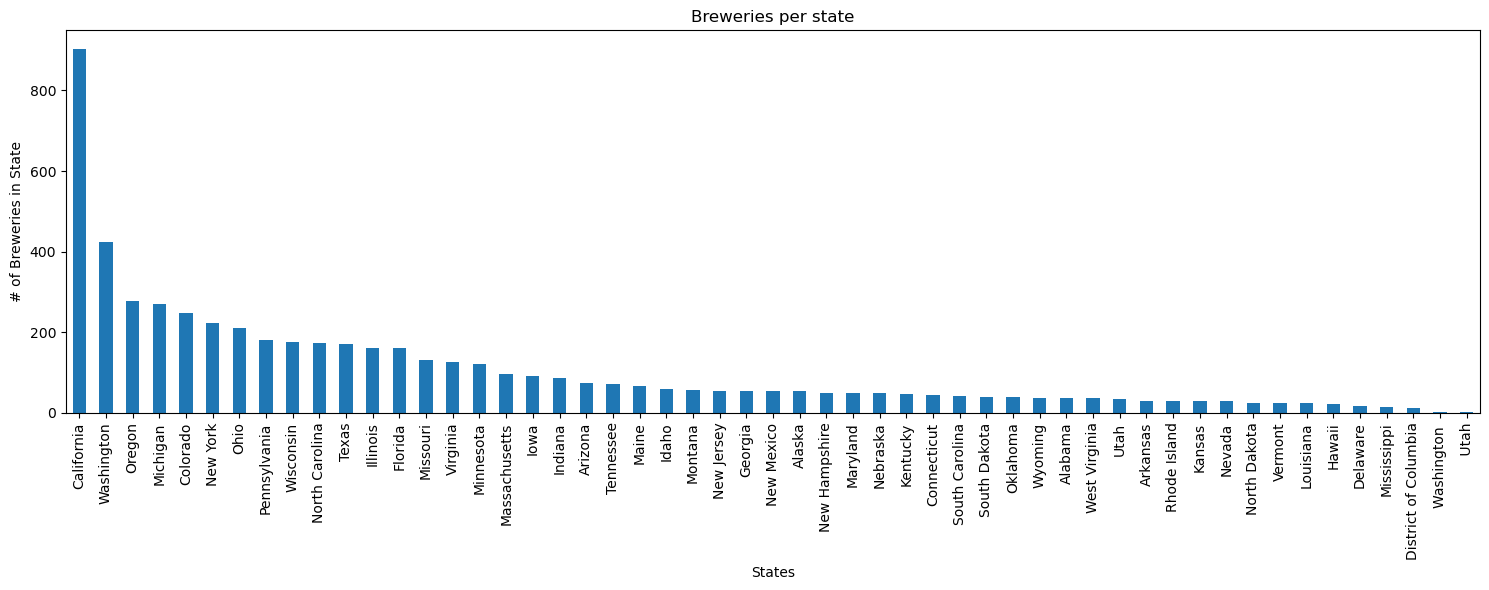

In [12]:
#Plot Bar chart showing each states brewery count.
state_brewery_sort.plot(kind = "bar", title = "Breweries per state", legend = False, figsize=[15,6])
plt.xlabel("States")
plt.ylabel("# of Breweries in State")
plt.tight_layout()
plt.savefig("Breweries per state.png")



In [46]:
# Read csv
avg_income_df = pd.read_csv("../Brewery_Project_One/average-income-by-state.csv")
avg_income_df

FileNotFoundError: [Errno 2] No such file or directory: '../Brewery_Project_One/average-income-by-state.csv'